| **Inicio** | **atrás 6** | **Siguiente 8** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./6_Stacking.ipynb)| [⏩](./8_Logistic_Regression.ipynb)|

# **7. Support Vector Machine**

![Support Vector Machine](../img/Support%20Vector%20Machine.jpg "Support Vector Machine")

**Introducción:**

La Máquina de Vectores de Soporte (SVM) es un algoritmo de aprendizaje supervisado utilizado tanto para clasificación como para regresión. El objetivo principal de SVM es encontrar el hiperplano óptimo que mejor separa las clases en el espacio de características. La idea central es identificar un margen máximo entre las clases, y los puntos de datos que definen este margen son los vectores de soporte.

**Terminología:**

1. **Hiperplano (Hyperplane):** En un espacio de N dimensiones, un hiperplano es un subespacio de dimensión N-1. En el caso de SVM lineal, es la línea que mejor separa las clases.

2. **Vectores de Soporte (Support Vectors):** Son los puntos de datos que definen el margen entre las clases. Estos son los puntos más cercanos al hiperplano y son esenciales para determinar la posición y orientación del hiperplano.

3. **Margen (Margin):** Es la distancia perpendicular desde el hiperplano a los vectores de soporte más cercanos. SVM busca maximizar este margen.

4. **Kernel:** Es una función que transforma los datos de entrada en un espacio de mayor dimensión. El uso de kernels permite a SVM manejar datos no lineales.

**Fórmula Matemática:**

Para SVM lineal, el hiperplano puede expresarse como:

$f(x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

Donde:

- $f(x)$ es la función del hiperplano.
- $(x_1, x_2, \ldots, x_n)$ son las características de entrada.
- $(\beta_1, \beta_2, \ldots, \beta_n)$ son los coeficientes del hiperplano.

La distancia de un punto $( x )$ al hiperplano se puede calcular como:

$\text{Distancia}(x) = \frac{|f(x)|}{\sqrt{\beta_1^2 + \beta_2^2 + \ldots + \beta_n^2}}$

La formulación de SVM busca maximizar el margen, lo que equivale a minimizar $( ||\beta||^2 )$ sujeto a las restricciones:

$y_i(f(x_i) - \beta_0) \geq 1 \text{ para } i = 1, 2, \ldots, N$

**Ejemplo con Gráficos en Python:**

A continuación, te proporciono un ejemplo simple de SVM lineal en Python utilizando la biblioteca Scikit-learn.

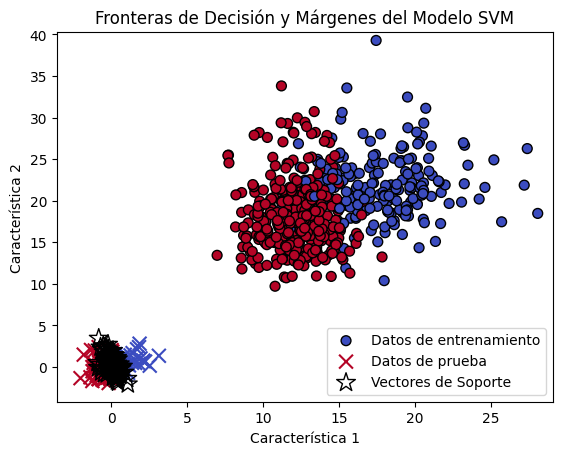

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos Breast Cancer
cancer = datasets.load_breast_cancer()
X = cancer.data[:, :2]  # Utilizar solo las primeras dos características para la visualización
y = cancer.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo SVM con kernel lineal
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Obtener límites del gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Crear una cuadrícula para evaluar el modelo
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
points = np.c_[xx.ravel(), yy.ravel()]
Z = svm_model.decision_function(points)

# Ajustar la forma de Z para que coincida con la cuadrícula
Z = Z.reshape(xx.shape)

# Visualizar las fronteras de decisión y márgenes
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', marker='o', s=50, label='Datos de entrenamiento')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', s=100, label='Datos de prueba')
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='k', marker='*', label='Vectores de Soporte')

# Etiquetas y título del gráfico
plt.title('Fronteras de Decisión y Márgenes del Modelo SVM')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

Este código entrena un SVM lineal en el conjunto de datos Iris y visualiza las fronteras de decisión y los vectores de soporte en un gráfico. La precisión del modelo también se imprime.

### **Ejemplo**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Crear un conjunto de datos sintético
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Crear un DataFrame con nombres de características
df = pd.DataFrame(data=np.c_[X, y], columns=['Feature1', 'Feature2', 'Label'])
df

,Feature1,Feature2,Label
0,1.228312,-0.757178,0.0
1,0.698409,-1.380295,0.0
2,2.548817,2.502258,1.0
3,0.573579,-1.352979,0.0
4,0.585900,-1.337457,0.0
...,...,...,...
95,0.473358,-1.438620,0.0
96,1.233323,1.239336,1.0
97,0.460109,-1.487396,0.0
98,0.679631,0.757837,1.0


Precisión del modelo SVM: 1.00


/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


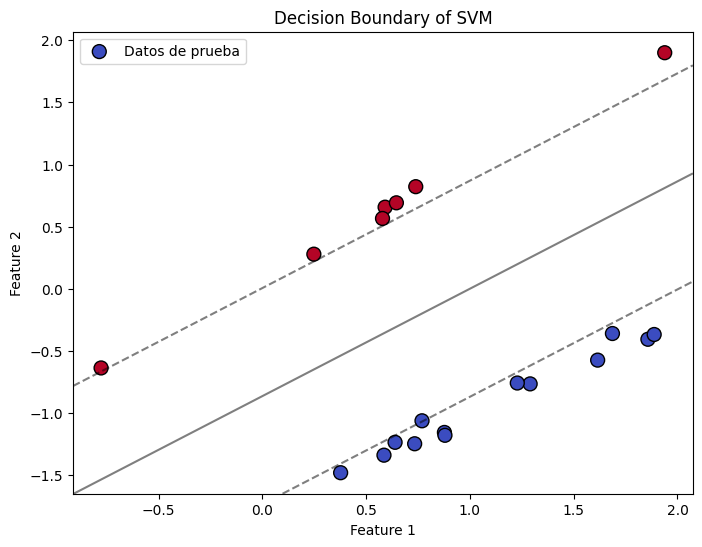

In [5]:
# Separar las características (X) y las etiquetas (y)
X = df[['Feature1', 'Feature2']]
y = df['Label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Entrenar el modelo SVM
svm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Calcular la precisión del modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Precisión del modelo SVM: {accuracy_svm:.2f}')

# Visualizar la decisión del modelo SVM
plt.figure(figsize=(8, 6))

# Scatter plot para el conjunto de datos
plt.scatter(X_test['Feature1'], X_test['Feature2'], c=y_test, cmap='coolwarm', edgecolors='k', marker='o', s=100, label='Datos de prueba')

# Límites de decisión del SVM
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Crear una cuadrícula para evaluar el modelo
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizar los límites de decisión
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Etiquetas y título
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of SVM')
plt.legend()
plt.show()

| **Inicio** | **atrás 6** | **Siguiente 8** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./6_Stacking.ipynb)| [⏩](./8_Logistic_Regression.ipynb)|